Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Create Dataset of Five Classes

In [ ]:
np.random.seed(44)
points_per_class = 500

# clusters for 5 classes
class_0 = np.random.randn(points_per_class, 2) + np.array([0, 0])
class_1 = np.random.randn(points_per_class, 2) + np.array([5, 0])
class_2 = np.random.randn(points_per_class, 2) + np.array([0, 5])
class_3 = np.random.randn(points_per_class, 2) + np.array([5, 5])
class_4 = np.random.randn(points_per_class, 2) + np.array([2.5, 2.5])

X = np.vstack((class_0, class_1, class_2, class_3, class_4))

# Create labels
Y_raw = np.array(
    [0]*points_per_class +
    [1]*points_per_class +
    [2]*points_per_class +
    [3]*points_per_class +
    [4]*points_per_class
)

Y = np.zeros((Y_raw.size, 5))
Y[np.arange(Y_raw.size), Y_raw] = 1


Visulize the data on Scatter Plot

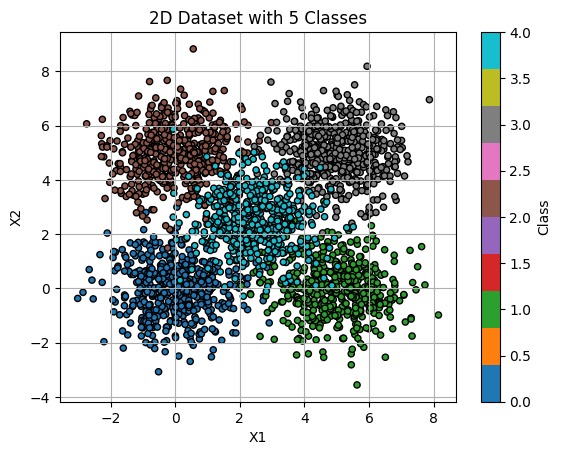

In [ ]:
if len(Y.shape) > 1:
    Y_plot= np.argmax(Y, axis=1)

# Plot the dataset with distinct colors for each class
plt.scatter(X[:, 0], X[:, 1], c=Y_plot, cmap='tab10', edgecolor='k', s=20)
plt.title("2D Dataset with 5 Classes")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.colorbar(label="Class")
plt.show()

Create Four hidden layer and Total Five Layer Neural Network

In [ ]:
import numpy as np

class NeuralNetwork_threeHidden(object):
    def __init__(self, hidden1, hidden2, hidden3):
        inputLayerNeurons = 2
        outLayerNeurons = 5
        self.learning_rate = 0.0001

        # Initialize weights
        self.W1 = np.random.randn(inputLayerNeurons, hidden1) * 0.1
        self.W2 = np.random.randn(hidden1, hidden2) * 0.1
        self.W3 = np.random.randn(hidden2, hidden3) * 0.1
        self.W4 = np.random.randn(hidden3, outLayerNeurons) * 0.1

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def softmax(self, x):
        exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_values / np.sum(exp_values, axis=1, keepdims=True)

    def feedForward(self, X):
        self.Z1 = np.dot(X, self.W1)
        self.A1 = self.sigmoid(self.Z1)

        self.Z2 = np.dot(self.A1, self.W2)
        self.A2 = self.sigmoid(self.Z2)

        self.Z3 = np.dot(self.A2, self.W3)
        self.A3 = self.sigmoid(self.Z3)

        self.Z4 = np.dot(self.A3, self.W4)
        self.pred = self.softmax(self.Z4)

        return self.pred

    def backPropagation(self, X, Y, pred):
        # Softmax + Cross entropy derivative = (pred - Y)
        delta4 = (pred - Y)

        error3 = delta4.dot(self.W4.T)
        delta3 = error3 * self.sigmoid_derivative(self.A3)

        error2 = delta3.dot(self.W3.T)
        delta2 = error2 * self.sigmoid_derivative(self.A2)

        error1 = delta2.dot(self.W2.T)
        delta1 = error1 * self.sigmoid_derivative(self.A1)

        # Update weights
        self.W4 -= self.learning_rate * self.A3.T.dot(delta4)
        self.W3 -= self.learning_rate * self.A2.T.dot(delta3)
        self.W2 -= self.learning_rate * self.A1.T.dot(delta2)
        self.W1 -= self.learning_rate * X.T.dot(delta1)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)

    def accuracy(self, X, Y):
        predictions = self.feedForward(X)
        predicted_classes = np.argmax(predictions, axis=1)
        true_classes = np.argmax(Y, axis=1)
        return np.mean(predicted_classes == true_classes)

    def confusion_matrix(self, X, Y):
        predictions = self.feedForward(X)
        predicted_classes = np.argmax(predictions, axis=1)
        true_classes = np.argmax(Y, axis=1)

        num_classes = Y.shape[1]
        conf_matrix = np.zeros((num_classes, num_classes), dtype=int)

        for true, pred in zip(true_classes, predicted_classes):
            conf_matrix[true, pred] += 1

        return conf_matrix


In [ ]:
hidden1 = 6
hidden2 = 8
hidden3 = 10

NN = NeuralNetwork_threeHidden(hidden1, hidden2, hidden3)

err = []
acc = []

for epoch in range(8000):
    NN.train(X, Y)
    predictions = NN.feedForward(X)

    # Cross-entropy loss
    loss = -np.mean(np.sum(Y * np.log(predictions + 1e-9), axis=1))
    err.append(loss)

    accuracy = NN.accuracy(X, Y)
    acc.append(accuracy)

conf_matrix = NN.confusion_matrix(X, Y)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[484   3   3   0  10]
 [  3 480   0   0  17]
 [  5   0 478   1  16]
 [  0   6   1 472  21]
 [ 18  30  11   9 432]]


Plot the confusion matrix

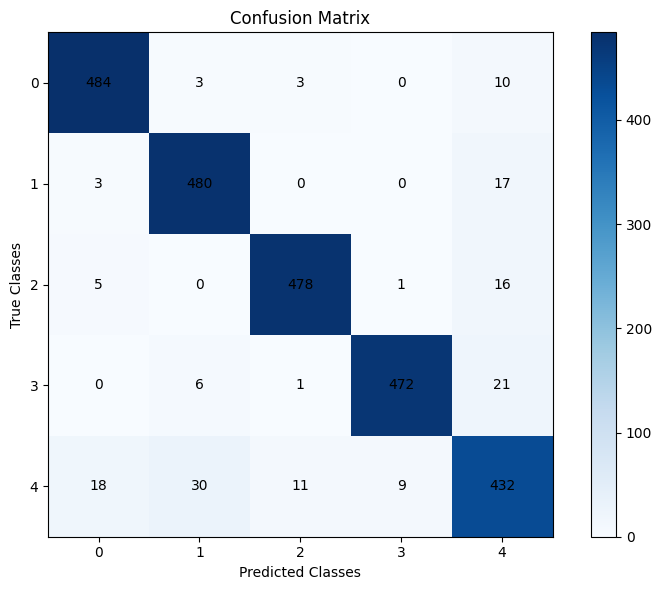

In [ ]:
conf_matrix = NN.confusion_matrix(X, Y)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap='Blues')
plt.colorbar()
plt.xticks(ticks=range(conf_matrix.shape[1]), labels=range(conf_matrix.shape[1]))
plt.yticks(ticks=range(conf_matrix.shape[0]), labels=range(conf_matrix.shape[0]))
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.title('Confusion Matrix')

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

Plot Accuracy and Losses

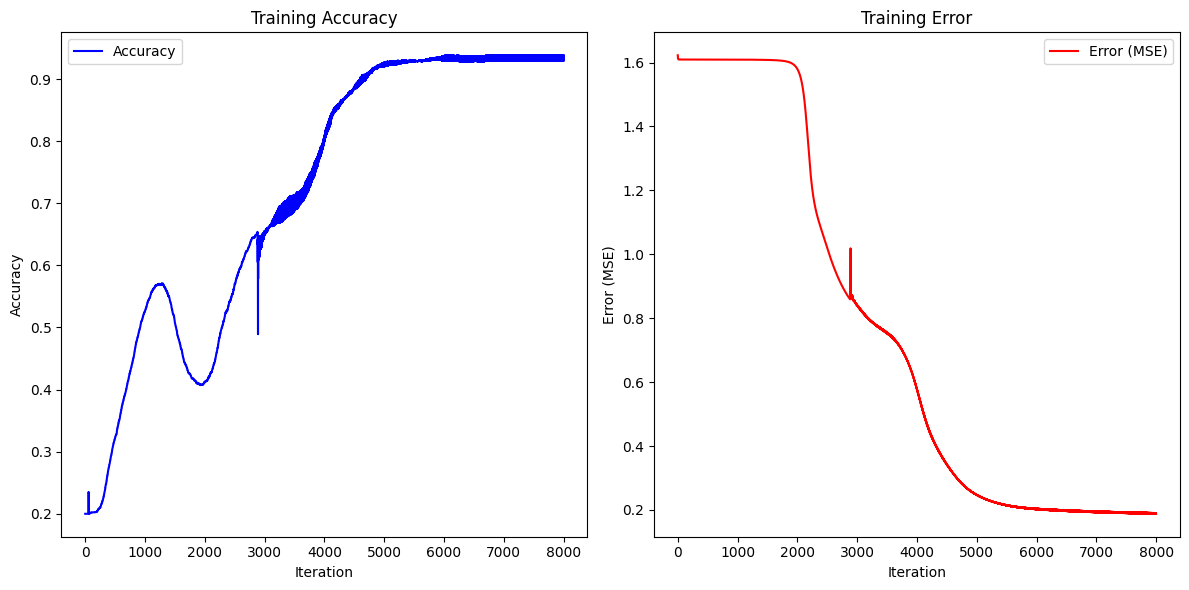

In [ ]:
# Plotting error and accuracy in subplots
plt.figure(figsize=(12, 6))

# Accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(acc, label='Accuracy', color='blue')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

# Error subplot
plt.subplot(1, 2, 2)
plt.plot(err, label='Error (MSE)', color='red')
plt.xlabel('Iteration')
plt.ylabel('Error (MSE)')
plt.title('Training Error')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

In [ ]:
np.random.seed(24)
test_points_per_class = 100

# ------- Generate 5 test clusters (matching 5 output classes) --------
test_class_0 = np.random.randn(test_points_per_class, 2) + np.array([0, 0])
test_class_1 = np.random.randn(test_points_per_class, 2) + np.array([5, 0])
test_class_2 = np.random.randn(test_points_per_class, 2) + np.array([0, 5])
test_class_3 = np.random.randn(test_points_per_class, 2) + np.array([5, 5])
test_class_4 = np.random.randn(test_points_per_class, 2) + np.array([2.5, 2.5])  # NEW CLASS

# Combine test data
X_test = np.vstack((test_class_0,
                    test_class_1,
                    test_class_2,
                    test_class_3,
                    test_class_4))

# Labels for 5 classes
Y_test_raw = (
    [0]*test_points_per_class +
    [1]*test_points_per_class +
    [2]*test_points_per_class +
    [3]*test_points_per_class +
    [4]*test_points_per_class
)

Y_test_raw = np.array(Y_test_raw)

# -------- One-hot encode (5 classes) --------
Y_test = np.zeros((Y_test_raw.size, 5))
Y_test[np.arange(Y_test_raw.size), Y_test_raw] = 1

# -------- Evaluate --------
test_accuracy = NN.accuracy(X_test, Y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

conf_matrix_test = NN.confusion_matrix(X_test, Y_test)
print("Confusion Matrix (Test):")
print(conf_matrix_test)


Test Accuracy: 0.9420
Confusion Matrix (Test):
[[98  0  0  0  2]
 [ 0 98  0  0  2]
 [ 0  0 97  0  3]
 [ 0  0  0 96  4]
 [ 8  5  3  2 82]]


**Test Result Discussion**

    Test Accuracy: 0.9420
    Confusion Matrix (Test):


Confusion matrix for Test Data

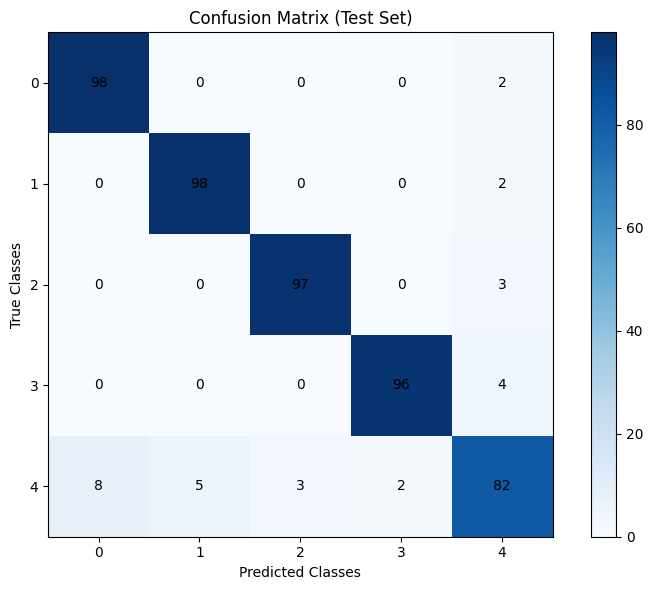

In [ ]:
conf_matrix = NN.confusion_matrix(X_test, Y_test)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap='Blues')
plt.colorbar()
plt.xticks(ticks=range(conf_matrix.shape[1]), labels=range(conf_matrix.shape[1]))
plt.yticks(ticks=range(conf_matrix.shape[0]), labels=range(conf_matrix.shape[0]))
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.title('Confusion Matrix (Test Set)')

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

**Key Observations from test result:**

The model achieved high test accuracy of 94.2%.

- Class 0 and 1: Almost perfect classification with only 2 misclassifications (98% accuracy).

- Class 2 and 3: 97 instances were correctly classified, with only 3 misclassified as class 4 and class 3 has 4 misclassifications.

- Class 4: Has the lowest accuracy of 86%.

**Conclusion:**

- The model performs decent on the test set, with minimal errors, especially in classes 0, 1, and 2.

- The slight misclassification in class 3 and a large misclassification in class 4 suggests potential areas for improvement, but the overall performance is good.


**Conclusion**

Key Findings:

1. Strong Performance: Most instances were correctly classified with minimal misclassifications.
2. Class Accuracy: High accuracy across classes, with only a few misclassifications, often between closely related classes.
3. Training Convergence: After approximately 6500 epochs, the loss became constant, indicating that the model had effectively trained and converged. Accuracy was approximately 94%.

Challenges and Lessons Learned:

1. Class Imbalance: Slight misclassifications suggest room for improvement in handling certain classes.
2. Overfitting: Balancing complexity and data to prevent overfitting.
3. Data Quality: Clean, well-preprocessed data is crucial.

Potential Improvements:

1. Architecture: Experiment with different layers, neurons, and activation functions (e.g., ReLU).
2. Regularization: Use dropout, L2 regularization, and early stopping.
3. Hyperparameter Tuning: Optimize learning rate, batch size, and training iterations.
4. Further Experiments: Use cross-validation and advanced optimizers like Adam or RMSprop.

In summary, the model performed well, converging with nearly 94% accuracy after 6500 epochs. Further improvements can be made through architectural tuning and handling class imbalances.